<a href="https://colab.research.google.com/github/Kondasagar/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

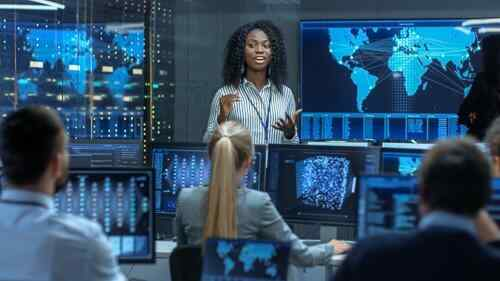

## Mounting the drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the requisite libraries which are important for this analysis

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import wordcloud
from scipy import signal
import warnings
warnings.filterwarnings('ignore')


In [3]:
# loading the data set
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_projects/Global_terrorism/Copy of Global Terrorism Data.csv',encoding='latin1',low_memory=False)

## Exploring the Original Data set:


---




In [4]:
print(f"shape of our data set is {df.shape}")

shape of our data set is (181691, 135)


In [5]:
# first five rows of data set
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# last five rows of the data set
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [7]:
# summary of data set by using .info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
# statistic of  numerical features in our data set
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# names of features(columns) in our data set 
for col in df.columns:
  print(col,end=' ; ')
  

eventid ; iyear ; imonth ; iday ; approxdate ; extended ; resolution ; country ; country_txt ; region ; region_txt ; provstate ; city ; latitude ; longitude ; specificity ; vicinity ; location ; summary ; crit1 ; crit2 ; crit3 ; doubtterr ; alternative ; alternative_txt ; multiple ; success ; suicide ; attacktype1 ; attacktype1_txt ; attacktype2 ; attacktype2_txt ; attacktype3 ; attacktype3_txt ; targtype1 ; targtype1_txt ; targsubtype1 ; targsubtype1_txt ; corp1 ; target1 ; natlty1 ; natlty1_txt ; targtype2 ; targtype2_txt ; targsubtype2 ; targsubtype2_txt ; corp2 ; target2 ; natlty2 ; natlty2_txt ; targtype3 ; targtype3_txt ; targsubtype3 ; targsubtype3_txt ; corp3 ; target3 ; natlty3 ; natlty3_txt ; gname ; gsubname ; gname2 ; gsubname2 ; gname3 ; gsubname3 ; motive ; guncertain1 ; guncertain2 ; guncertain3 ; individual ; nperps ; nperpcap ; claimed ; claimmode ; claimmode_txt ; claim2 ; claimmode2 ; claimmode2_txt ; claim3 ; claimmode3 ; claimmode3_txt ; compclaim ; weaptype1 ; wea

In [10]:
print(df.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [11]:
# finding duplicate rows
df.duplicated().value_counts()

False    181691
dtype: int64

## All rows are unique

In [12]:
df['nkill'].sum()

411868.0

In [13]:
# 'nkillus' : the number us people dies
df['nkillus'].value_counts()

0.0       116344
1.0          589
2.0          159
3.0           53
4.0           32
5.0           20
6.0           12
7.0            4
15.0           3
9.0            3
17.0           3
13.0           2
60.0           2
8.0            2
20.0           1
1327.0         1
16.0           1
14.0           1
10.0           1
38.0           1
182.0          1
168.0          1
1360.0         1
12.0           1
19.0           1
189.0          1
31.0           1
241.0          1
11.0           1
30.0           1
44.0           1
Name: nkillus, dtype: int64

In [14]:
# 'nkill' : the total number of fatalities including 'US' citizens
df['nkill'].value_counts()

0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: nkill, Length: 205, dtype: int64

In [15]:
# number of times a country appeared in our data set (number of times atttacks placed in that country)
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: country_txt, Length: 205, dtype: int64

## The Most number of terrorist attacks happened in Iraq then followed by Pakistan, Afghanistan, India and Colombia.

In [16]:
# the active terrorist groups
df['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
Ansar Sarallah                                          1
Sword of Islam                                          1
Support of Ocalan-The Hawks of Thrace                   1
Arab Revolutionary Front                                1
MANO-D                                                  1
Name: gname, Length: 3537, dtype: int64

In [17]:
print(f"The most active terrorist group in the world is {df['gname'].value_counts().index[1]}.")

The most active terrorist group in the world is Taliban.


In [18]:
# the maximum number of people killed in an attack
print(f"The most number of people killed in an attack is {df['nkill'].max()}.")

The most number of people killed in an attack is 1570.0.


In [19]:
# number of terrorist attacks happened in each year from max to min number of times.
df["iyear"].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [20]:
print(f"Year with most number of terrorist attacks is : {df['iyear'].value_counts().idxmax()}")

Year with most number of terrorist attacks is : 2014


In [21]:
print(f"Year with least number of terrorist attacks is : {df['iyear'].value_counts().idxmin()}")

Year with least number of terrorist attacks is : 1971


In [22]:
df['attacktype1_txt'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [23]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

## The most attack type done by terrorist is Bombing/Explosion.

In [24]:
# finding null values in country text
df['country_txt'].isnull().value_counts()

False    181691
Name: country_txt, dtype: int64

## No null values in country_txt column


---
NaN and null value are interchangeble words in python language.


# There is a lot of data in this dataframe. So we can extract the data which is useful for our analysis. 

# If we want to rename some column names, we can so that the readers can understand the data by seeing the column name. 

# We had to check for null values in our data. And we had to handle those missing values and null values by removing them or by replacing them with appropriate values.

In [25]:
# the whole 135 columns name in original dataframe
print(df.columns.to_list())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [26]:
# first two rows
df.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [27]:
# extracting important features(columns) to create new data frame for EDA
new_df=df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city',  'latitude', 'longitude', 'summary', 'attacktype1_txt', 'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound']]

In [28]:
# Renaming columns name for better understanding
new_df.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':"Region", 'provstate':'State', 'city':'City',
                       'latitude':'Latitude', 'longitude':'Longitude', 'summary':'Summary', 'attacktype1_txt':'Attack_Type', 'targtype1_txt':'Target_Type', 'gname':'Group',
                       'weaptype1_txt':'Weapon_Type', 'nkill':'Killed', 'nwound':'Wounded'},inplace=True)

In [29]:
# summary about new data frame
new_df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [30]:
# information about features in new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   State        181270 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   Summary      115562 non-null  object 
 10  Attack_Type  181691 non-null  object 
 11  Target_Type  181691 non-null  object 
 12  Group        181691 non-null  object 
 13  Weapon_Type  181691 non-null  object 
 14  Killed       171378 non-null  float64
 15  Wounded      165380 non-null  float64
dtypes: float64(4), int64(3), object(9)
memory usage: 22.2+ MB


## In new_df, total entries(rows) are around 1,81,691. If we abserve the non-null values count, we can say that, there are lot of null values in columns named "Latitude", "Longitude", "Summary", "Killed". Even if we decided to remove the rows which are having null values we will end up with more than 1,15,000 rows (These rows are enough for Exploratory Data Analysis).

In [31]:
# Replacing null values in killed and wounded with zero
new_df["Killed"]=new_df["Killed"].fillna(0).astype(int)
new_df["Wounded"]=new_df["Wounded"].fillna(0).astype(int)

In [32]:
# Dropping the rows which are having one or more than one null value
new_df=new_df.dropna()

In [33]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114175 entries, 5 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         114175 non-null  int64  
 1   Month        114175 non-null  int64  
 2   Day          114175 non-null  int64  
 3   Country      114175 non-null  object 
 4   Region       114175 non-null  object 
 5   State        114175 non-null  object 
 6   City         114175 non-null  object 
 7   Latitude     114175 non-null  float64
 8   Longitude    114175 non-null  float64
 9   Summary      114175 non-null  object 
 10  Attack_Type  114175 non-null  object 
 11  Target_Type  114175 non-null  object 
 12  Group        114175 non-null  object 
 13  Weapon_Type  114175 non-null  object 
 14  Killed       114175 non-null  int64  
 15  Wounded      114175 non-null  int64  
dtypes: float64(2), int64(5), object(9)
memory usage: 14.8+ MB


In [34]:
# first ten rows
new_df.head(10)

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Summary,Attack_Type,Target_Type,Group,Weapon_Type,Killed,Wounded
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Armed Assault,Police,Black Nationalists,Firearms,0,0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Utilities,Unknown,Explosives,0,0
8,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Military,New Year's Gang,Incendiary,0,0
9,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,"1/3/1970: Karl Armstrong, a member of the New ...",Facility/Infrastructure Attack,Government (General),New Year's Gang,Incendiary,0,0
11,1970,1,6,United States,North America,Colorado,Denver,39.758968,-104.876305,1/6/1970: Unknown perpetrators threw a Molotov...,Facility/Infrastructure Attack,Military,Left-Wing Militants,Incendiary,0,0
13,1970,1,9,United States,North America,Michigan,Detroit,42.331685,-83.047924,1/9/1970: Unknown perpetrators set off a fireb...,Facility/Infrastructure Attack,Government (General),Left-Wing Militants,Incendiary,0,0
14,1970,1,9,United States,North America,Puerto Rico,Rio Piedras,18.386932,-66.061127,1/9/1970: The Armed Commandos of Liberation c...,Facility/Infrastructure Attack,Business,Armed Commandos of Liberation,Incendiary,0,0
17,1970,1,12,United States,North America,New York,New York City,40.697132,-73.931351,1/12/1970: Unknown perpetrators threw a pipe b...,Bombing/Explosion,Educational Institution,Black Nationalists,Explosives,0,0
18,1970,1,12,United States,North America,Puerto Rico,Rio Grande,18.379998,-65.830948,1/12/1970: Unknown perpetrators detonated a bo...,Bombing/Explosion,Business,Strikers,Explosives,0,0
19,1970,1,13,United States,North America,Washington,Seattle,47.610786,-122.331306,1/13/1970: Unknown perpetrators firebombed Fus...,Facility/Infrastructure Attack,Business,Black Nationalists,Incendiary,0,0


## Univariate Analysis:

In [35]:
# Percentage of diifernt attack types
print("Percentage of diifernt attack types among total attacks:\n")
(new_df['Attack_Type'].value_counts()/new_df.shape[0])*100

Percentage of diifernt attack types among total attacks:



Bombing/Explosion                      52.738340
Armed Assault                          23.410554
Hostage Taking (Kidnapping)             6.973506
Assassination                           6.191373
Facility/Infrastructure Attack          5.459164
Unknown                                 4.014014
Unarmed Assault                         0.568426
Hostage Taking (Barricade Incident)     0.361725
Hijacking                               0.282899
Name: Attack_Type, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

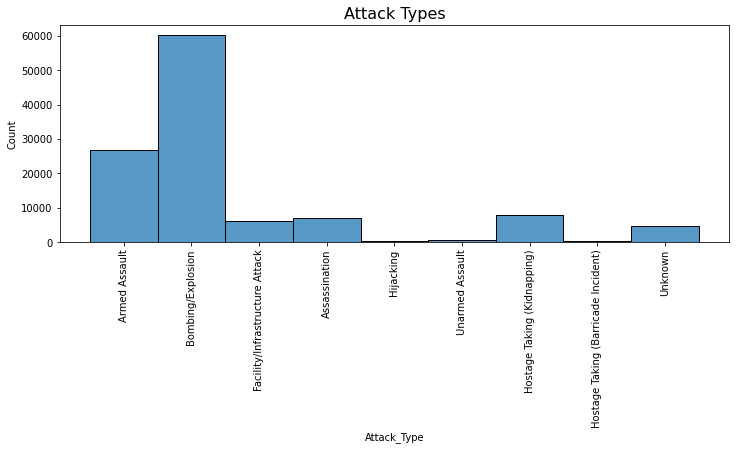

In [36]:
# visualisation of attack type distribution

plt.figure(figsize=(12,4))

# histogram
sns.histplot(new_df['Attack_Type'],palette='cubehelix')
plt.title('Attack Types',fontsize=16)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Attack Types')

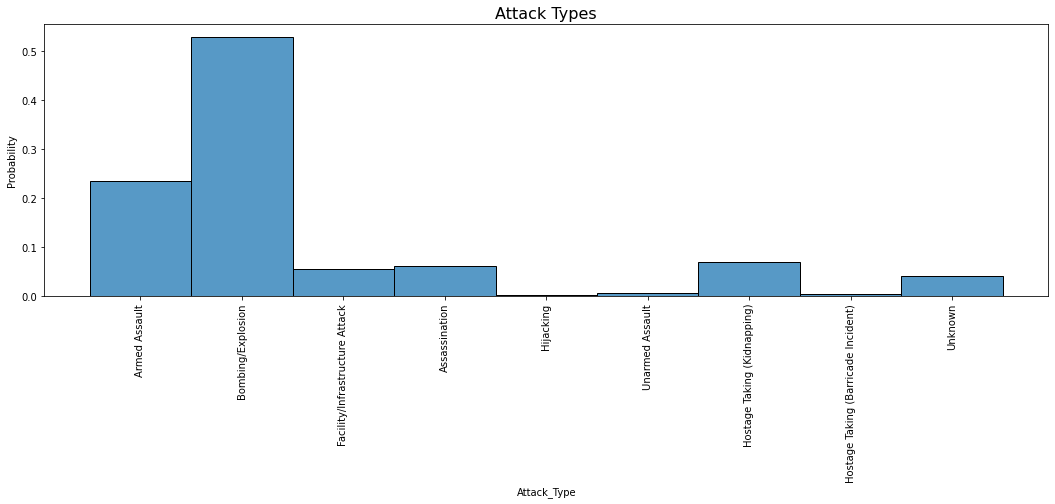

In [98]:
# Plot histogram
sns.histplot(data = new_df, x = "Attack_Type", stat = "probability", discrete = True)
plt.xticks(rotation=90)
plt.title('Attack Types',fontsize=16)

## Observations:
1. The Bombing/Explosion is more than 50% .
2. The Armed Assault is around 24% .

## Countries and Number of times attacks happened in that country:

In [38]:
new_df.Country.value_counts()

Iraq                              24352
Pakistan                          12582
Afghanistan                       12393
India                              9087
Philippines                        4957
                                  ...  
St. Lucia                             1
Cuba                                  1
Bahamas                               1
International                         1
People's Republic of the Congo        1
Name: Country, Length: 170, dtype: int64

* International mentioned becuase, attack may be happened in sea territory.

In [45]:
print(f"The top ten countries attacked by terrorist groups  list is: \n {new_df['Country'].value_counts()[:10].index}")

The top ten countries attacked by terrorist groups  list is: 
 Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Philippines', 'Somalia',
       'Nigeria', 'Thailand', 'Yemen', 'Colombia'],
      dtype='object')


Text(0, 0.5, 'Number of times attacked')

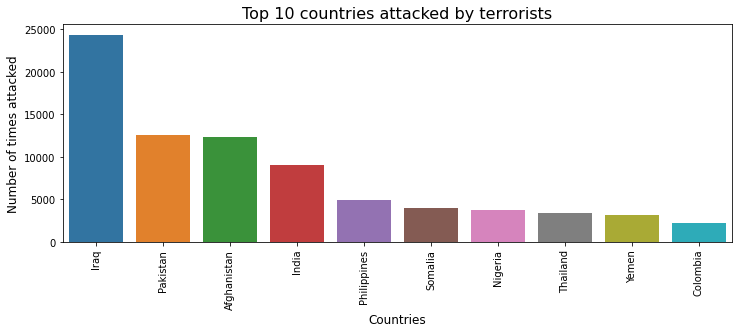

In [42]:
#  Countries which are most number of times attacked 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Country'].value_counts()[:10].index,new_df['Country'].value_counts()[:10].values)
plt.title('Top 10 countries attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Countries',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)


In [49]:
# Percentage of diifernt Target types
print("Percentage of diifernt Target types among total attacks:\n")
(new_df['Target_Type'].value_counts().head(10)/new_df.shape[0])*100

Percentage of diifernt Target types among total attacks:



Private Citizens & Property       27.162689
Military                          16.350339
Police                            14.765054
Government (General)              10.997153
Business                           8.287278
Unknown                            4.414276
Transportation                     2.840377
Religious Figures/Institutions     2.796584
Educational Institution            2.693234
Utilities                          2.052113
Name: Target_Type, dtype: float64

Text(0, 0.5, 'Number of times attacked')

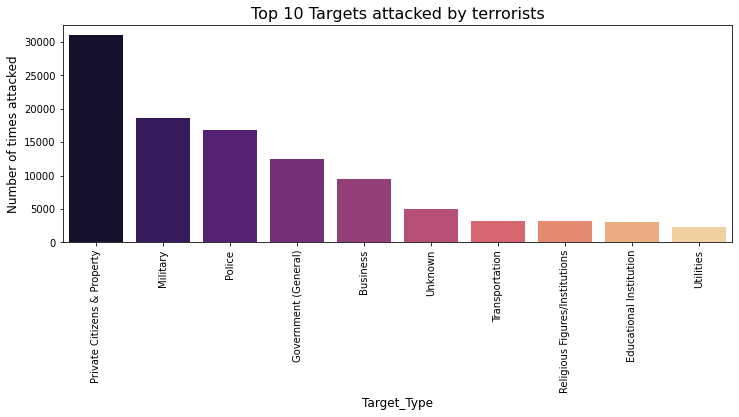

In [50]:
# Bar plot of Target type 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Target_Type'].value_counts()[:10].index,new_df['Target_Type'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 Targets attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Target_Type',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)

## 'Top 10 Targets attacked by terrorists' graph observations:
1. The most times attacked target type is 'Private Citizens & Property' which    is around 27% of the total number of attacks.
2. After 'Private Citizens & Property' , 'Military', 'Police',
 'Government(General)' are the most times attacked target types.

## Regions and states with most attacks:

Text(0, 0.5, 'Number of times attacked')

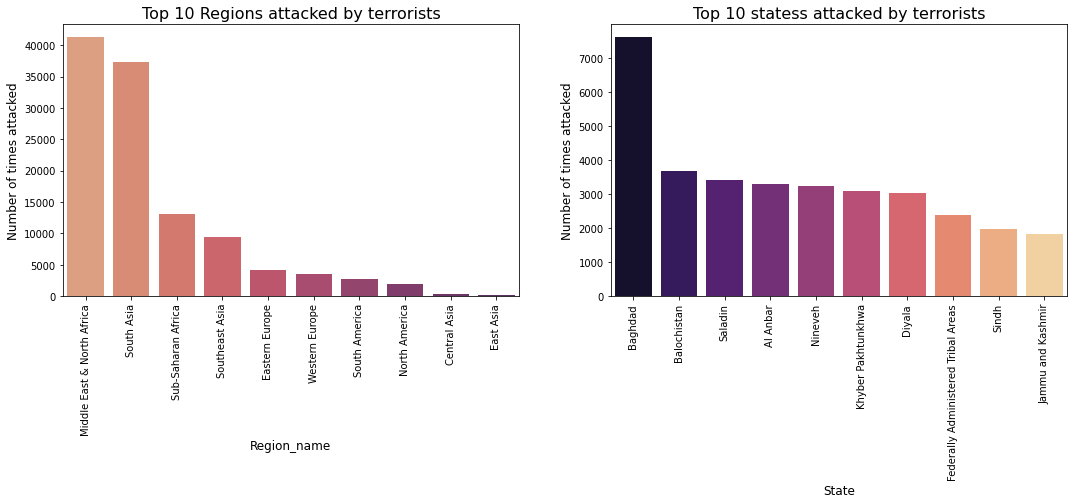

In [74]:
# top 10 regions with most attacks
plt.subplot(1,2,1)
sns.barplot(new_df['Region'].value_counts()[:10].index,new_df['Region'].value_counts()[:10].values,palette='flare')
plt.title('Top 10 Regions attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Region_name',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)

# subplot about states
plt.subplot(1,2,2)
sns.barplot(new_df['State'].value_counts()[:10].index,new_df['State'].value_counts()[:10].values,palette='magma')
plt.title('Top 10 statess attacked by terrorists',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('State',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)
# plt.rcParams['figure.figsize'] = [18, 5]

## From above two plots, we can say
1. The most attacked region is "Middle East & North Africa", then comes 
   "South Asia".
2. The most attacked city is "Baghdad" which is capital of Iraq.

In [75]:
new_df.Weapon_Type.value_counts()

Explosives                                                                     64229
Firearms                                                                       32993
Unknown                                                                         8333
Incendiary                                                                      5811
Melee                                                                           2225
Chemical                                                                         232
Sabotage Equipment                                                               109
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      108
Other                                                                             86
Biological                                                                        26
Fake Weapons                                                                      13
Radiological                                                     

Text(0, 0.5, 'Number of times attacked')

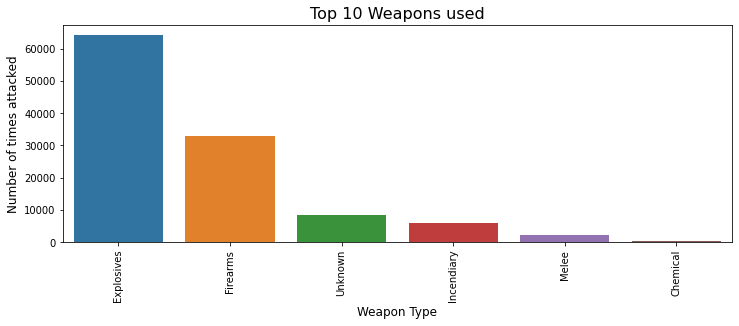

In [77]:
#  Weapon_Types  most times used 
plt.figure(figsize=(12,4))
sns.barplot(new_df['Weapon_Type'].value_counts()[:6].index,new_df['Weapon_Type'].value_counts()[:6].values)
plt.title('Top 10 Weapons used',fontsize=16)
plt.xticks(rotation=90)
plt.xlabel('Weapon Type',fontsize=12)
plt.ylabel('Number of times attacked',fontsize=12)

In [80]:
(new_df['Weapon_Type'].value_counts().head(6)/new_df.shape[0])*100

Explosives    56.254872
Firearms      28.896869
Unknown        7.298445
Incendiary     5.089556
Melee          1.948763
Chemical       0.203197
Name: Weapon_Type, dtype: float64

Most likely weapon types used are "Explosives" (around 56%) and "Firearms"
 (around 29%).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

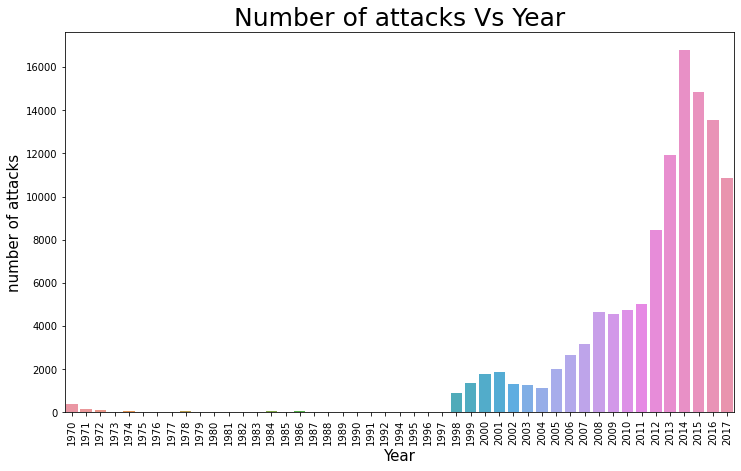

In [93]:
# number of attacks in each year 
# it can be done by using simple count plot
plt.figure(figsize=(12,7))
sns.countplot(x ='Year', data = new_df)
plt.title('Number of attacks Vs Year',fontsize=25)
plt.ylabel('number of attacks',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=90)

***
* The maximum number of attacks happened in the year of 2014.
* We can see significant increase in number of attacks from 1998.
* After 2014, number of attacks dicreased, but as you can see they are large number of attacks

In [96]:
# new column named "casualities" can be defined by using "KIlled" and "Wounded" features
new_df["Casualties"]=new_df["Killed"]+new_df["Wounded"]
new_df.head(2)

,Year,Month,Day,Country,Region,State,City,Latitude,Longitude,Summary,Attack_Type,Target_Type,Group,Weapon_Type,Killed,Wounded,Casualties
5,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,1/1/1970: Unknown African American assailants ...,Armed Assault,Police,Black Nationalists,Firearms,0,0,0
7,1970,1,2,United States,North America,California,Oakland,37.791927,-122.225906,1/2/1970: Unknown perpetrators detonated explo...,Bombing/Explosion,Utilities,Unknown,Explosives,0,0,0
